In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/sample_data/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
df.info

<bound method DataFrame.info of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
0         1537.0       606.0         6.6085            344700.0  
1          809.0       277.0         3.5990            176500.0  
2         1484.0       495.0         5.7934            270500.0  
3           49.0        11.0         6.1359            330000.0  
4          850.0       237.0         2.9375             81700.0  
...          ...         ...            ...                 ...  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0  

[3000 rows x 9 columns]>

In [ ]:
#check for missing values
missing_values=df.isnull().sum()
#calculate the percentage of missing data in each column
missing_percentage=(missing_values/len(df))*100
#display the missing values in column
print("missing_values\n",missing_values)
print("missing_percentage\n",missing_percentage)

missing_values
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
missing_percentage
 longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64


In [ ]:
#remove rows with missing values
data_cleaned = df.dropna()
#verify that missing values have been removed
print("\n missing value in each rows and column:")
print(data_cleaned.isnull().sum())


 missing value in each rows and column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


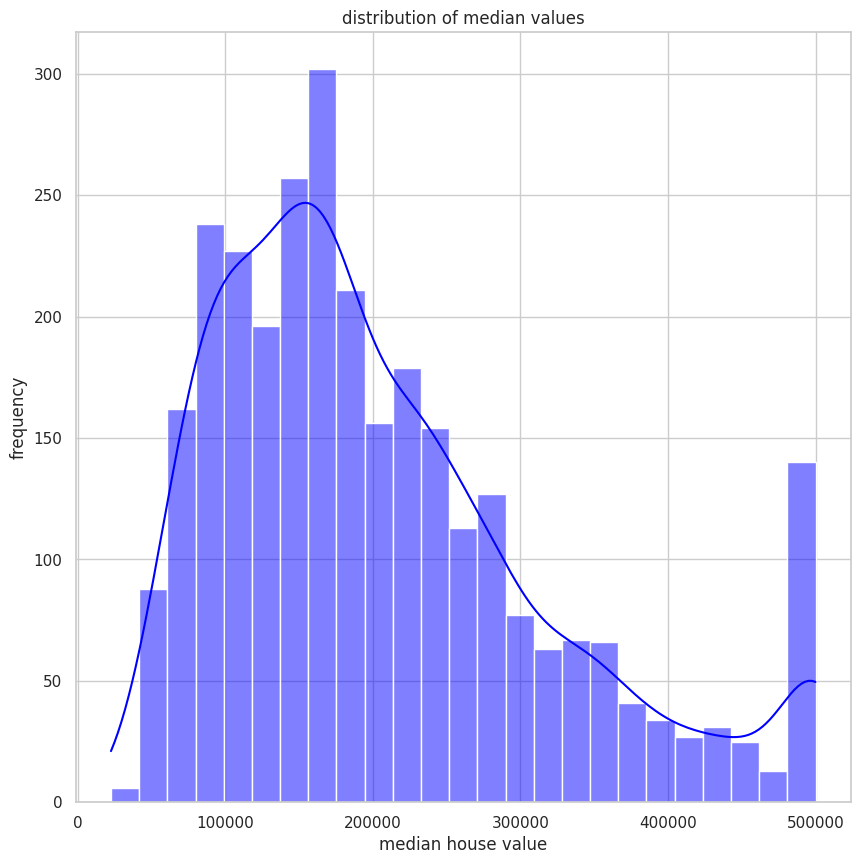

In [ ]:
sns.set(style="whitegrid")#discrite figures
plt.figure(figsize=(10,10))#figure size
sns.histplot(data_cleaned['median_house_value'],color='blue',kde=True)
plt.title('distribution of median values')
plt.xlabel('median house value')
plt.ylabel('frequency')
plt.show()

In [ ]:
#assuming 'data' is your Datframe and 'mediumhouse of teh column of the interset
Q1=data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3=data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR=Q3-Q1

#definethe bounds for the outliers
lower_bound =Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#remove outliers
data_no_outliers=data_cleaned[(data_cleaned['median_house_value']>=lower_bound)&(data_cleaned['median_house_value']<=upper_bound)]
#check the shape of the data before and after removal of outliers
print("original data shape:",data_cleaned.shape)
print("new data shape without outliers",data_no_outliers.shape)

121200.0
263975.0
original data shape: (3000, 9)
new data shape without outliers (2859, 9)


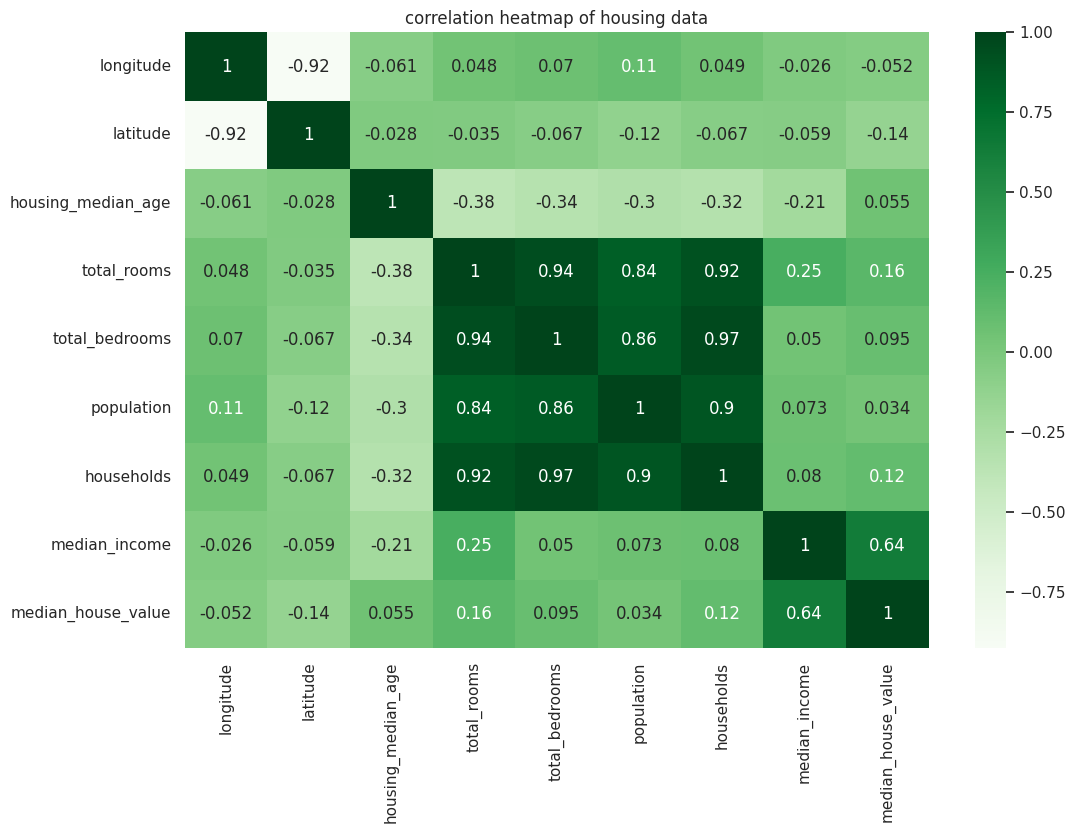

In [ ]:
data=data_no_outliers
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.title('correlation heatmap of housing data')
plt.show()

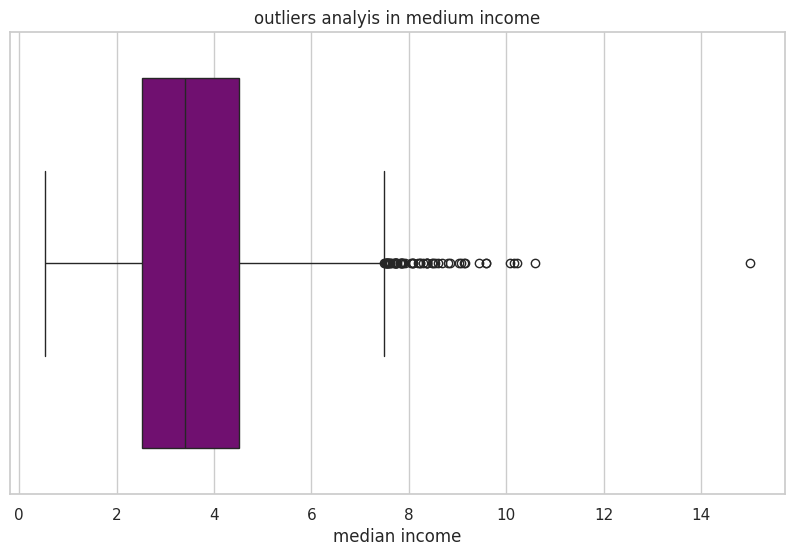

In [ ]:
#outliers of the mediam income
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers['median_income'],color='purple')
plt.title("outliers analyis in medium income")
plt.xlabel("median income")
plt.show()

In [ ]:
#unique value count for categorical data
for column in ['ocean_proximity']:
  # Check if the column exists before trying to access it
  if column in data.columns:
      print("Unique values in {column}:",data[column].unique())
  else:
      print(f"Column '{column}' not found in the DataFrame.")

Column 'ocean_proximity' not found in the DataFrame.


In [ ]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity')
data=pd.concat([data.drop("ocean_proximity",axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

KeyError: 'ocean_proximity'

In [ ]:
ocean_proximity_dummies = pd.get_dummies(data_no_outliers['ocean_proximity'],prefix='ocean_proximity') # Use data_no_outliers which still contains 'ocean_proximity'
data=pd.concat([data.drop("ocean_proximity",axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

KeyError: 'ocean_proximity'

In [ ]:
data.columns

In [ ]:
data = data.drop("ocean_proximity_ISLAND",axis = 1)
data.columns

In [ ]:
data.head()

In [ ]:
#define your features(independent variables)and target(dependent variable)
features = {'longitude','latitude','housing_median_age','total_rooms',
            'total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN',
            'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'}
target={'median_house_value'}
X = data[features]
y = data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=111)
#check the size of the splits
print('training set size:{x_train.shape[0]} samples')
print('test set size:{x_test.shape[0]} samples')

In [ ]:
X_test_const=sm.add_constant(X_train)
#fit OLS modal ordinary least square
modal_fitted=sm.OLS(y_train,X_test_const).fit()
#printing summary
print(modal_fitted.summary())

In [ ]:
#adding a constant to the test predictors
X_test_const=sm.add_constant(X_test)
#making predictions on the test set
test_predictions=modal_fitted.predict(X_test_const)

In [ ]:
#checking ols assumptions
#scatter plot for observed vs predicated values on test data
plt.scatter(X_test_const,test_predictions,color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicated Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test,y_test,color="darkred")
plt.show

Random samples

In [ ]:
#calculate the mean of the residuals
mean_residuals = np.mean(modal_fitted.resid)
print(f"The mean of the  residuals is {np.round(mean_residuals,2)}")

In [ ]:
#plotting residuals
plt.scatter(modal_fitted.fittedvalues,modal_fitted.resid,color="navyblue")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
#exogeneity
#calculate the residuals
residuals = modal_fitted.resid
#check the correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column],residuals)[0,1]
  print(f'Correlation between residuals and {column}:{np.round(corr_coefficient,2)}')

In [ ]:
#homoskedasticity
#plotting the residuals
plt.scatter(modal_fitted.fittedvalues,modal_fitted.resid,color="forestgreen")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs Fitted values')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
#initialize the standardScaler
scaler=StandardScaler()
#fit the scalar on the traing data and transform it
X_train_scaled=scaler.fit_transform(X_train)
#apply the same transformations to the test data
X_test_scaled=scaler.transform(X_test)

In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'MSE on Test Set: {mse}')
print(f'RMSE on Test Set: {rmse}')